In [89]:
import pandas as pd
import numpy as np
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from random import sample
from mpl_toolkits.mplot3d import Axes3D
from fasterMapping import *
from sklearn import mixture
from sklearn import metrics
from tqdm import tqdm
from mpl_toolkits import mplot3d
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

In [118]:
import math

def sigmoid(x):
  return ((1 / (1 + 100000**(-x)))*2)-1

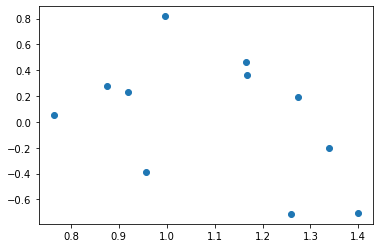

In [8]:
moralCategoryVectors


reuse = TruncatedSVD(n_components=2, random_state=1).fit_transform(moralCategoryVectors)

plt.scatter(reuse[:, 0], reuse[:,1])

In [151]:
mappings = pickle.load(open('data/scores2.p', 'rb'))

In [152]:
mappings

{318: [array([ 0.01040424, -0.03711091, -0.01370902, -0.04845009,  0.01658836]),
  array([-0.05456358,  0.01788222, -0.03426719,  0.0621023 , -0.01425169]),
  array([ 0.00858948, -0.04855026, -0.02462698, -0.06122623,  0.00837009])],
 58559: [array([ 0.01580791, -0.03457502, -0.00134687, -0.04670968,  0.02167415]),
  array([-0.03988684, -0.00551144,  0.04433534,  0.0240738 ,  0.02026098]),
  array([ 0.0125817 , -0.04692593, -0.01868189, -0.0581494 ,  0.00897899])],
 122886: [array([ 0.00561745, -0.03233656, -0.01366909, -0.04559118,  0.00961806]),
  array([ 0.00442801, -0.00203043,  0.00414585,  0.05181377,  0.01620164]),
  array([ 0.0160753 , -0.03870372, -0.01579073, -0.05448911,  0.01475774])],
 4993: [array([ 0.00424977, -0.03930757, -0.015699  , -0.04940781,  0.00757226]),
  array([ 0.01519089, -0.04385203, -0.01652236, -0.00968225, -0.03164068]),
  array([ 0.01068712, -0.04963988, -0.02522453, -0.06238511,  0.00507003])],
 109487: [array([ 0.0081172 , -0.04238477, -0.02020407, -0

In [153]:
score_tags = []
score_reviews = []
score_summaries = []

for movie in mappings:
    score_tags.append(mappings[movie][0])
    score_reviews.append(mappings[movie][1])
    score_summaries.append(mappings[movie][2])

In [154]:
score_tags

[array([ 0.01040424, -0.03711091, -0.01370902, -0.04845009,  0.01658836]),
 array([ 0.01580791, -0.03457502, -0.00134687, -0.04670968,  0.02167415]),
 array([ 0.00561745, -0.03233656, -0.01366909, -0.04559118,  0.00961806]),
 array([ 0.00424977, -0.03930757, -0.015699  , -0.04940781,  0.00757226]),
 array([ 0.0081172 , -0.04238477, -0.02020407, -0.05245487,  0.00726532]),
 array([ 0.01799679, -0.03821911, -0.01786887, -0.05197046,  0.00865186]),
 array([ 0.01396918, -0.02920329, -0.00515037, -0.0473474 ,  0.01613393]),
 array([ 0.01454861, -0.04172054, -0.01053092, -0.05062554,  0.01260453]),
 array([ 0.00700825, -0.03350352, -0.00374664, -0.04638171,  0.01046814]),
 array([ 0.0103132 , -0.04196173, -0.01328188, -0.0483214 ,  0.00726926]),
 array([ 0.00176155, -0.03999865, -0.02340502, -0.05385327,  0.00739858]),
 array([-0.002756  , -0.03583406, -0.01019138, -0.05324005,  0.01207136]),
 array([ 0.00534028, -0.03470253, -0.01656625, -0.04134999,  0.00663167]),
 array([ 0.01229865, -0.0

In [236]:
tag_mappings = pickle.load(open('data/scores_tags.p', 'rb'))
# tag_mappings = pickle.load(open('data/moral_tags_doc_vec.p', 'rb'))
tags = []
sig_tags = []
movies_tag = []
sig_v = np.vectorize(sigmoid)
for movie in tag_mappings:
    tags.append(tag_mappings[movie])
    sig_tags.append(sig_v(tag_mappings[movie]))
    movies_tag.append(movie)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.096s...
[t-SNE] Computed neighbors for 992 samples in 0.795s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.008918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.452530
[t-SNE] KL divergence after 1000 iterations: 1.060148


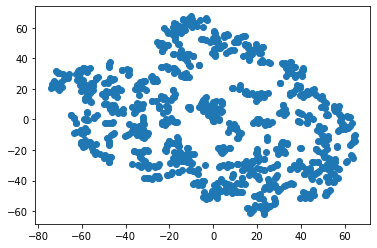

In [224]:
embedded_tags = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(tags)
plt.scatter(embedded_tags[:, 0], embedded_tags[:,1])

In [145]:
embedded_tags = TSNE(n_components=3, random_state=1, verbose=True, perplexity=10.0).fit_transform(tags)


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 259 samples in 0.000s...
[t-SNE] Computed neighbors for 259 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 259 / 259
[t-SNE] Mean sigma: 0.000452
[t-SNE] KL divergence after 250 iterations with early exaggeration: 109.498482
[t-SNE] KL divergence after 1000 iterations: 1.712280


In [47]:
embedded_tags
m = 0
ind = []
for i in range(len(embedded_tags)):
    if 100 < max(abs(embedded_tags[i])):
        m = max(abs(embedded_tags[i]))
        ind.append(i)
print(m)
print(ind)

126.35405
[267]


In [49]:
embedded_tags[267][0] = 0

In [51]:
embedded_tags[267]

array([ 0.      , -9.066603, -3.608887], dtype=float32)

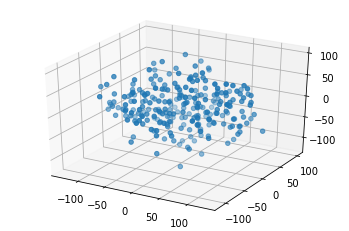

In [146]:

fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line


ax.scatter3D(embedded_tags[:, 0], embedded_tags[:,1], embedded_tags[:,2] );

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.001s...
[t-SNE] Computed neighbors for 992 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.002308
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.995399
[t-SNE] KL divergence after 1000 iterations: 0.887698


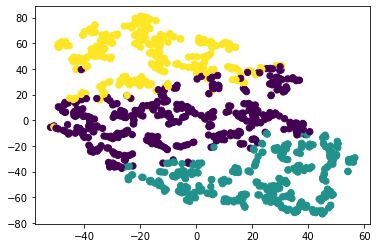

In [375]:
gmm=mixture.GaussianMixture(3, n_init=10).fit(sig_tags) 
labels = plot_gmm(gmm, sig_tags)

In [376]:
labeled_movies = []
for i in range(len(labels)):
    labeled_movies.append([labels[i], movies_tag[i]])
    

class_labels = pd.DataFrame(labeled_movies, columns=['Labels', 'movieId'])

In [377]:
class_labels.head()

,Labels,movieId
0,1,1
1,1,2
2,0,6
3,2,10
4,1,11


In [300]:
class_labels.to_csv('data/movie_labels_tags_4.csv')

In [378]:
class_labels.to_csv('data/movie_labels_tags_3.csv')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.003s...
[t-SNE] Computed neighbors for 992 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.000401
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.947655
[t-SNE] KL divergence after 1000 iterations: 0.808622


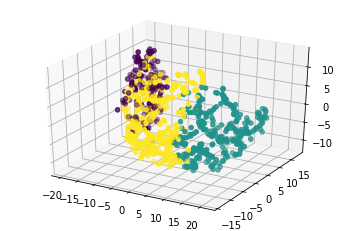

In [238]:
def plot_gmm_3d(gmm, X, label=True, ax=None):
    labels = gmm.fit(X).predict(X)
    embedded = TSNE(n_components=3, random_state=1, verbose=True, perplexity=10.0).fit_transform(X)
    embedded[267][0] = 0
    ax = plt.axes(projection='3d')
    ax.scatter3D(embedded[:, 0], embedded[:,1], embedded[:,2] ,c=labels,cmap='viridis');
    return labels

    
gmm=mixture.GaussianMixture(3).fit(tags) 
labels = plot_gmm_3d(gmm, tags)

In [67]:
l = {14:0,17:0,2:0,0:0,5:0}
for i in labels:
    l[i] += 1
print(l)

{14: 32, 17: 548, 2: 148, 0: 260, 5: 4}


In [366]:
review_mappings = pickle.load(open('data/scores_reviews.p', 'rb'))
reviews = []
movies_reviews = []
for movie in review_mappings:
    reviews.append(review_mappings[movie])
    movies_reviews.append(movie)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.134s...
[t-SNE] Computed neighbors for 992 samples in 1.294s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.041557
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.508965
[t-SNE] KL divergence after 1000 iterations: 1.479285


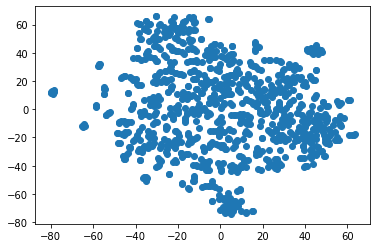

In [233]:

embedded_reviews = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(reviews)
plt.scatter(embedded_reviews[:, 0], embedded_reviews[:,1])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.100s...
[t-SNE] Computed neighbors for 992 samples in 0.937s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.041557
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.508965
[t-SNE] KL divergence after 1000 iterations: 1.479285


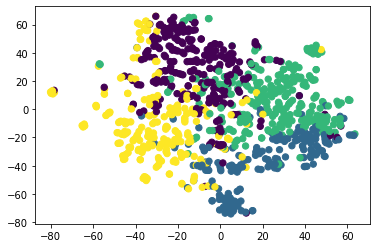

In [234]:
gmm=mixture.GaussianMixture(4).fit(reviews) 
plot_gmm(gmm,reviews)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.136s...
[t-SNE] Computed neighbors for 992 samples in 1.226s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.041557
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.507538
[t-SNE] KL divergence after 1000 iterations: 1.662170


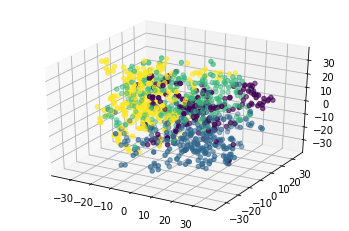

In [302]:
gmm=mixture.GaussianMixture(4).fit(reviews) 
labels = plot_gmm_3d(gmm, reviews)

In [367]:
summary_mappings = pickle.load(open('data/scores_summaries.p', 'rb'))
summary = []
movies_summary = []
for movie in summary_mappings:
    summary.append(summary_mappings[movie])
    movies_summary.append(movie)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.022s...
[t-SNE] Computed neighbors for 992 samples in 0.161s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.071974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.665077
[t-SNE] KL divergence after 1000 iterations: 1.681294


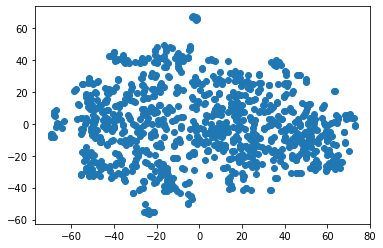

In [184]:
reduce = TruncatedSVD(n_components=50, random_state=1).fit_transform(summary)
embedded_summary = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(reduce)
plt.scatter(embedded_summary[:, 0], embedded_summary[:,1])

In [194]:
withMorals = summary + moralCategoryVectors

In [195]:
reduce = TruncatedSVD(n_components=50, random_state=1).fit_transform(withMorals)
embedded_summary = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(reduce)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1003 samples in 0.016s...
[t-SNE] Computed neighbors for 1003 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1003
[t-SNE] Computed conditional probabilities for sample 1003 / 1003
[t-SNE] Mean sigma: 0.071408
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.419785
[t-SNE] KL divergence after 1000 iterations: 1.707584


In [200]:
len(moralCategoryVectors)

11

In [205]:
labs = np.zeros(1003)
labs[-11:] = 1
labs[-1] = 2

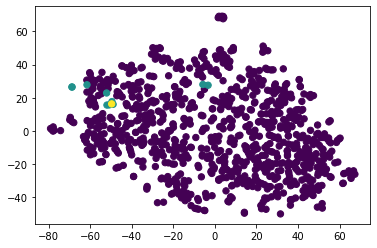

In [206]:

plt.scatter(embedded_summary[:, 0], embedded_summary[:, 1], c=labs, s=40, cmap='viridis', zorder=2)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.091s...
[t-SNE] Computed neighbors for 992 samples in 0.945s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.079813
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.231293
[t-SNE] KL divergence after 1000 iterations: 1.799265


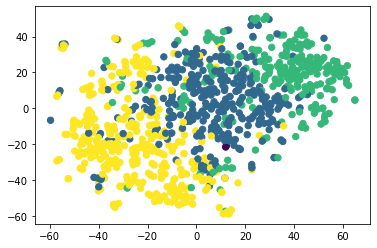

In [185]:
gmm=mixture.GaussianMixture(4).fit(summary) 
plot_gmm(gmm,summary)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.129s...
[t-SNE] Computed neighbors for 992 samples in 1.383s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.079813
[t-SNE] KL divergence after 250 iterations with early exaggeration: 131.865067
[t-SNE] KL divergence after 1000 iterations: 2.659229


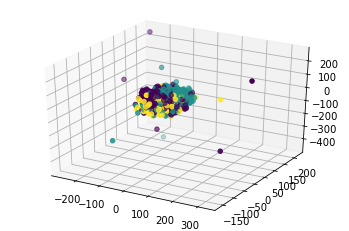

In [180]:
gmm=mixture.GaussianMixture(3).fit(summary) 
labels = plot_gmm_3d(gmm, summary)

In [370]:
combo = []
for movie in movies_summary:
    combo.append(np.average([tags[movies_tag.index(movie)], reviews[movies_reviews.index(movie)], summary[movies_summary.index(movie)]], axis=0))
    

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.002s...
[t-SNE] Computed neighbors for 992 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.005417
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.641815
[t-SNE] KL divergence after 1000 iterations: 1.078838


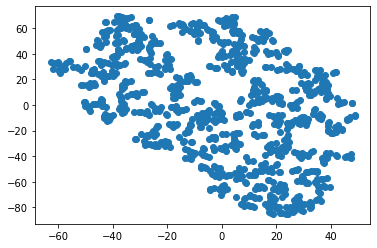

In [372]:
combo_reduce = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(combo)
plt.scatter(combo_reduce[:, 0], combo_reduce[:,1])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.009s...
[t-SNE] Computed neighbors for 992 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.005417
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.641815
[t-SNE] KL divergence after 1000 iterations: 1.078838


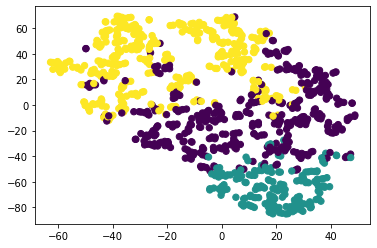

In [379]:
gmm=mixture.GaussianMixture(3).fit(combo) 
combo_labels = plot_gmm(gmm,combo)

In [380]:
labeled_movies = []
for i in range(len(movies_summary)):
    labeled_movies.append([combo_labels[i], movies_summary[i]])
    

class_labels = pd.DataFrame(labeled_movies, columns=['Labels', 'movieId'])
class_labels.to_csv('data/movie_labels_combo_3.csv')

In [418]:
labeled_movies = []
for i in range(len(movies_summary)):
    labeled_movies.append([combo_labels[i], movies_summary[i], combo[i][0], combo[i][1], combo[i][2], combo[i][3], combo[i][4]])
    

class_labels = pd.DataFrame(labeled_movies, columns=['Labels', 'movieId', 'Harm', 'Fairness', 'Ingroup', 'Authority', 'Purity'])

In [420]:
class_labels.groupby('Labels').mean().to_csv('data/combo_moral.csv')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.002s...
[t-SNE] Computed neighbors for 992 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.005417
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.951836
[t-SNE] KL divergence after 1000 iterations: 0.931551


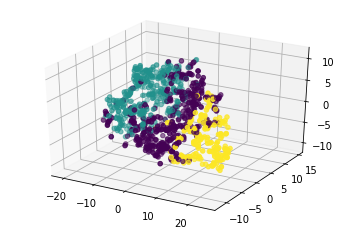

In [374]:
gmm=mixture.GaussianMixture(3).fit(combo) 
labels = plot_gmm_3d(gmm, combo)

In [354]:
users_mappings = pickle.load(open('data/scores_users.p', 'rb'))
users = []
users_reviews = []
for movie in users_mappings:
    users.append(users_mappings[movie])
    users_reviews.append(movie)


In [355]:
import random
users = random.sample(users, 4000)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.014s...
[t-SNE] Computed neighbors for 4000 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.657387
[t-SNE] KL divergence after 1000 iterations: 0.353405


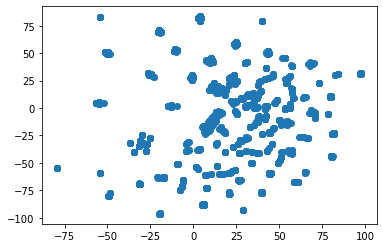

In [356]:
embedded_users = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(users)
plt.scatter(embedded_users[:, 0], embedded_users[:,1])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.015s...
[t-SNE] Computed neighbors for 4000 samples in 0.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.657387
[t-SNE] KL divergence after 1000 iterations: 0.353405


array([0, 0, 2, ..., 2, 1, 1], dtype=int64)

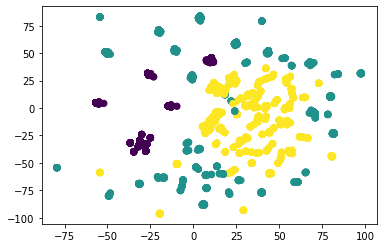

In [359]:
gmm=mixture.GaussianMixture(3).fit(users) 
plot_gmm(gmm,users)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.011s...
[t-SNE] Computed neighbors for 4000 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.862564
[t-SNE] KL divergence after 1000 iterations: 0.437152


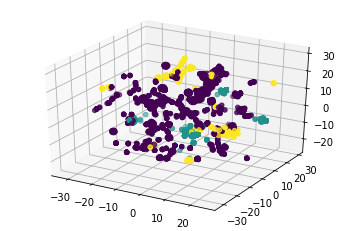

In [364]:
gmm=mixture.GaussianMixture(3).fit(users) 
labels = plot_gmm_3d(gmm, users)

In [319]:
users_imdb_mappings = pickle.load(open('data/scores_imdb_users.p', 'rb'))
users_imdb = []
users_imdb_users = []
for user in users_imdb_mappings:
    users_imdb.append(users_imdb_mappings[user])
    users_imdb_users.append(user)

In [398]:
users_imdb_movies_mappings2 = pickle.load(open('data/scores_imdb_users_movies.p', 'rb'))

In [406]:
users_imdb_mappings2 = pickle.load(open('data/scores_imdb_users.p', 'rb'))
users_imdb2 = []
users_imdb_users2 = []
print(len(users_imdb_mappings2))
cnt = 0
for user in random.sample(list(users_imdb_mappings2),19759):
    if user in users_imdb_movies_mappings2:
        cnt += 1
        users_imdb2.append(users_imdb_mappings2[user])
        users_imdb_users2.append(user)
print(cnt)

19759
958


In [407]:

users_imdb_movies2 = []
users_imdb_movies_users2 = []
for user in users_imdb_users2:
    users_imdb_movies2.append(users_imdb_movies_mappings2[user])
    users_imdb_movies_users2.append(user)
    

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 958 samples in 0.002s...
[t-SNE] Computed neighbors for 958 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 958 / 958
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.155685
[t-SNE] KL divergence after 1000 iterations: 0.894758


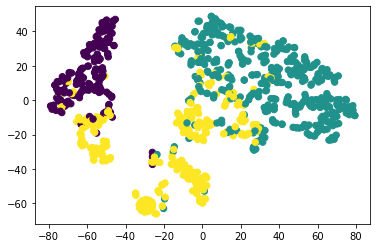

In [411]:
gmm=mixture.GaussianMixture(3).fit(users_imdb2) 
user_labels = plot_gmm(gmm,users_imdb2)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 958 samples in 0.143s...
[t-SNE] Computed neighbors for 958 samples in 0.483s...
[t-SNE] Computed conditional probabilities for sample 958 / 958
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.877853
[t-SNE] KL divergence after 1000 iterations: 0.721000


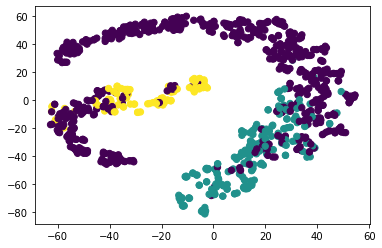

In [412]:
gmm=mixture.GaussianMixture(3).fit(users_imdb_movies2) 
user_labels2 = plot_gmm(gmm,users_imdb_movies2)

In [414]:
labeled_movies = []
for i in range(len(users_imdb_users2)):
    labeled_movies.append([user_labels2[i], users_imdb_users2[i]])
    

class_labels = pd.DataFrame(labeled_movies, columns=['Labels', 'userIdImdb'])
class_labels.to_csv('data/user_labels_movie_3.csv')

In [447]:
labeled_movies = []
for i in range(len(users_imdb_users2)):
    labeled_movies.append([user_labels2[i], users_imdb_users2[i], users_imdb_movies2[i][0], users_imdb_movies2[i][1], users_imdb_movies2[i][2], users_imdb_movies2[i][3], users_imdb_movies2[i][4]])
    

class_labels = pd.DataFrame(labeled_movies, columns=['Labels', 'movieId', 'Harm', 'Fairness', 'Ingroup', 'Authority', 'Purity'])

In [449]:
class_labels.groupby('Labels').mean().to_csv('data/user_movie_moral.csv')

In [310]:
arr = np.array(users_imdb)

In [316]:
for a in arr:
    if(a.shape != arr[0].shape):
        print(a.shape)
        print(a)

()
nan
()
nan
()
nan
()
nan
()
nan


In [320]:
users_imdb = random.sample(users_imdb, 2000)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.006s...
[t-SNE] Computed neighbors for 2000 samples in 0.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.107719
[t-SNE] KL divergence after 1000 iterations: 1.110993


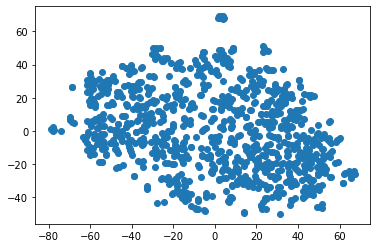

In [321]:
embedded_users = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(users_imdb)
plt.scatter(embedded_users[:, 0], embedded_users[:,1])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.004s...
[t-SNE] Computed neighbors for 2000 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.107719
[t-SNE] KL divergence after 1000 iterations: 1.110993


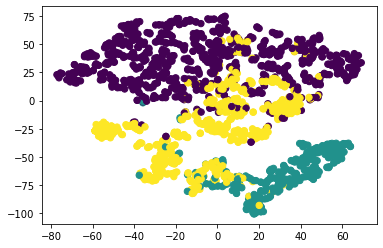

In [382]:
gmm=mixture.GaussianMixture(3).fit(users_imdb) 
user_labels = plot_gmm(gmm,users_imdb)

In [383]:
labeled_movies = []
for i in range(len(users_imdb_users)):
    labeled_movies.append([user_labels[i], users_imdb_users[i]])
    

class_labels = pd.DataFrame(labeled_movies, columns=['Labels', 'userIdImdb'])
class_labels.to_csv('data/user_labels_movie_3.csv')

IndexError: index 2000 is out of bounds for axis 0 with size 2000

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.005s...
[t-SNE] Computed neighbors for 2000 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.107719
[t-SNE] KL divergence after 1000 iterations: 1.110993


array([1, 2, 2, ..., 2, 2, 3], dtype=int64)

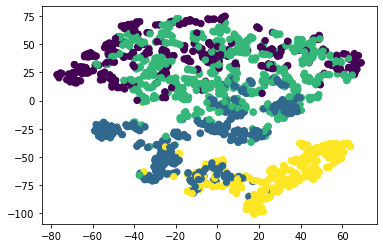

In [349]:
gmm=mixture.GaussianMixture(4).fit(users_imdb) 
plot_gmm(gmm,users_imdb)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.005s...
[t-SNE] Computed neighbors for 2000 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.107719
[t-SNE] KL divergence after 1000 iterations: 1.110993


array([4, 4, 4, ..., 4, 4, 2], dtype=int64)

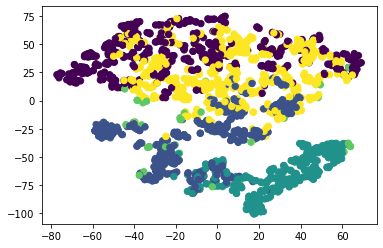

In [350]:
gmm=mixture.GaussianMixture(5).fit(users_imdb) 
plot_gmm(gmm,users_imdb)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.006s...
[t-SNE] Computed neighbors for 2000 samples in 0.070s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.107719
[t-SNE] KL divergence after 1000 iterations: 1.110993


array([4, 2, 4, ..., 4, 4, 3], dtype=int64)

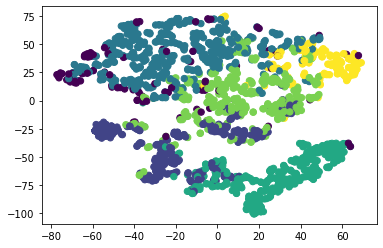

In [351]:
gmm=mixture.GaussianMixture(6).fit(users_imdb) 
plot_gmm(gmm,users_imdb)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.006s...
[t-SNE] Computed neighbors for 2000 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.107719
[t-SNE] KL divergence after 1000 iterations: 1.110993


array([5, 5, 5, ..., 5, 5, 3], dtype=int64)

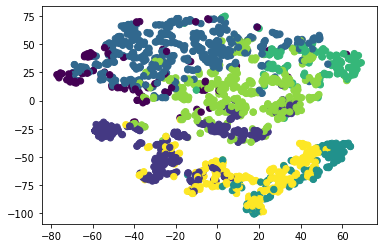

In [352]:
gmm=mixture.GaussianMixture(7).fit(users_imdb) 
plot_gmm(gmm,users_imdb)

In [472]:
color = '#69d'
sns.dark_palette("#69d", reverse=True, as_cmap=True)
def plot_gmm(gmm, X, label=True, ax=None):
    
    labels = gmm.fit(X).predict(X)
    embedded = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(X)
    ax = sns.scatterplot(x=embedded_users[:, 0], y=embedded_users[:,1], hue=labels, hue_order)
    ax.set_title('User Moral Clustering')
    return labels

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.007s...
[t-SNE] Computed neighbors for 2000 samples in 0.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.107719
[t-SNE] KL divergence after 1000 iterations: 1.110993


array([1, 2, 2, ..., 1, 1, 0], dtype=int64)

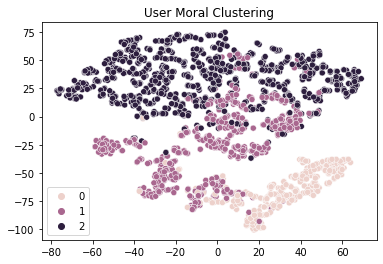

In [473]:
gmm=mixture.GaussianMixture(3).fit(users_imdb) 
plot_gmm(gmm,users_imdb)

In [438]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
install('seaborn')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.004s...
[t-SNE] Computed neighbors for 2000 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.107719
[t-SNE] KL divergence after 1000 iterations: 1.110993


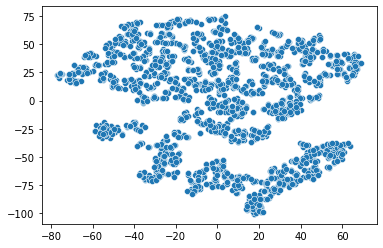

In [439]:
import seaborn as sns

embedded_users = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(users_imdb)
sns.scatterplot(x=embedded_users[:, 0], y=embedded_users[:,1])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.006s...
[t-SNE] Computed neighbors for 2000 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.209091
[t-SNE] KL divergence after 1000 iterations: 0.976117


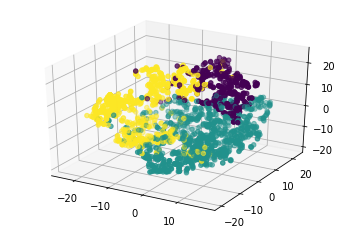

In [361]:
gmm=mixture.GaussianMixture(3).fit(users_imdb) 
labels = plot_gmm_3d(gmm, users_imdb)

In [337]:
users_imdb_movies_mappings = pickle.load(open('data/scores_imdb_users_movies.p', 'rb'))
users_imdb_movies = []
users_imdb_movies_users = []
for user in users_imdb_movies_mappings:
    users_imdb_movies.append(users_imdb_movies_mappings[user])
    users_imdb_movies_users.append(user)
    
users_imdb_movies = random.sample(users_imdb_movies, 2000)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.219s...
[t-SNE] Computed neighbors for 2000 samples in 1.257s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.214035
[t-SNE] KL divergence after 1000 iterations: 0.861136


array([2, 2, 2, ..., 2, 0, 2], dtype=int64)

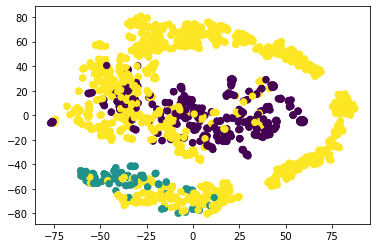

In [440]:
gmm=mixture.GaussianMixture(3).fit(users_imdb_movies) 
plot_gmm(gmm,users_imdb_movies)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.230s...
[t-SNE] Computed neighbors for 2000 samples in 1.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.601524
[t-SNE] KL divergence after 1000 iterations: 0.720597


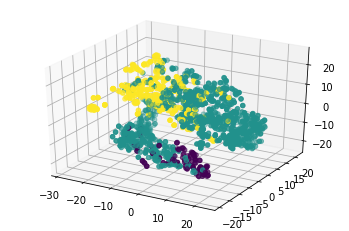

In [363]:
gmm=mixture.GaussianMixture(3).fit(users_imdb_movies) 
labels = plot_gmm_3d(gmm, users_imdb_movies)

In [445]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


        
def plot_gmm_3d(gmm, X, label=True, ax=None):
    labels = gmm.fit(X).predict(X)
    embedded = TSNE(n_components=3, random_state=1, verbose=True, perplexity=10.0).fit_transform(X)
    
    for i in range(len(embedded)):
        for j in range(len(embedded[i])):
            if(abs(embedded[i][j]) > 35):
                embedded[i][j] = 0
    embedded[267][0] = 0
    ax = plt.axes(projection='3d')
    ax.scatter3D(embedded[:, 0], embedded[:,1], embedded[:,2] ,c=labels,cmap='viridis');
    return labels
    
    

In [56]:
from sklearn import mixture
from sklearn import metrics
from tqdm import tqdm


def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [164]:
n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# generate spherical data centered on (20, 20)
shifted_gaussian1 = np.random.randn(n_samples, 2) + np.array([15, -25])

# generate spherical data centered on (20, 20)
shifted_gaussian2 = np.random.randn(n_samples, 2) + np.array([40, 0])

# generate spherical data centered on (20, 20)
shifted_gaussian3 = np.random.randn(n_samples, 2) + np.array([7, -10])

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, shifted_gaussian1, shifted_gaussian2, shifted_gaussian3, stretched_gaussian])

In [434]:

test_data = users_imdb_movies
cluster_type = mixture.GaussianMixture

n_clusters=np.arange(2, 10)
sils=[]
sils_err=[]
iterations=5
for n in tqdm(n_clusters):
    tmp_sil=[]
    for _ in range(iterations):
        gmm=cluster_type(n, n_init=2).fit(test_data) 
        labels=gmm.predict(test_data)
        sil=metrics.silhouette_score(test_data, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [11:10<00:00, 83.85s/it]


Text(0, 0.5, 'Score')

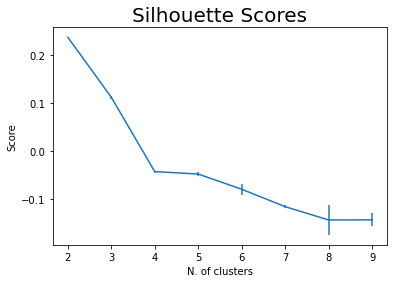

In [435]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [ ]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [426]:
from sklearn.model_selection import train_test_split
n_clusters=np.arange(2, 20)
iterations=20
results=[]
res_sigs=[]
for n in tqdm(n_clusters):
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(test_data, test_size=0.5)
        
        gmm_train=cluster_type(n).fit(train) 
        gmm_test=cluster_type(n).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [09:25<00:00, 31.43s/it]


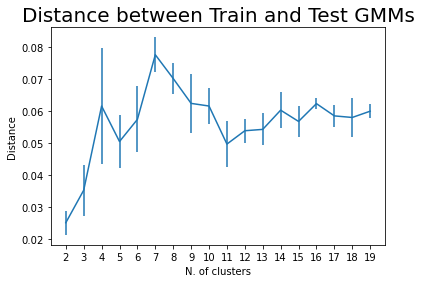

In [427]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

In [428]:
n_clusters=np.arange(2, 20)
bics=[]
bics_err=[]
iterations=20
for n in tqdm(n_clusters):
    tmp_bic=[]
    for _ in range(iterations):
        gmm=cluster_type(n).fit(test_data) 
        
        tmp_bic.append(gmm.bic(np.array(test_data)))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [01:13<00:00,  4.08s/it]


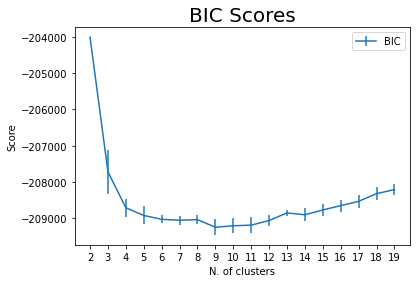

In [429]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

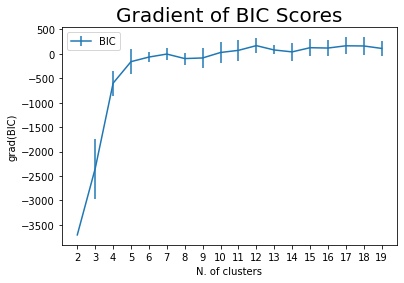

In [430]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()